# PART 1

# Project: Brain Stroke Analysis and Prediction.

Course: Applied Cloud Computing for Data Intensive Sciences 

Instructor: Elie Salomon


Group Members: Akhil Pratyush Simhambhatla

Gokul Rahunandhan Narayanasamy

Venkata Mani Babu Karri 


The objective of this project is to To develop a system that provides an insight into the prevalence of Brain stroke amongst 
different  demographics,  reviewing  and  analyzing  the  primary  risk  factors  associated  with  the 
occurrence of the stroke and the factors that cause the stroke in the first place. This system also 
helps  us  in  developing  an  intuitive  Machine  learning  models  that  can  help  us  in  predicting  the 
occurrence. 
The dataset we are using is brain stroke dataset. This dataset has nearly 5000 unique rows 
belonging to different individuals. This data is intercepted from different hospitals to keep the data 
as balanced as possible and without any bias. It has basic information about the patient like age, 
gender etc., along with that the dataset also gives us the information about the crucial vitals of the 
patient  like  Body  Mass  Index  (BMI),  presence  of  Hypertension,  marital  status,  work  type, 
residence type, Average glucose levels, heart disease status and finally stroke status. This dataset 
would  help  us  in  relating  various  parameters  and  vital  signs  of  a  patient  and  analyzing  this 
information to predict the occurrence of Brain Stroke in similar patients.  





The steps followed for this project are:
1. Data collection and Data cleaning
2. Analyzing the data using Spark SQL
3. Modifying the data 
4. Training and testing the data using various python inbuilt models
5. Training and testing the data using SparkML Lib Models


In [ ]:
#Step 1: Install Dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

#Step 2: Add environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"
os.environ["HADOOP_HOME"] = os.environ["SPARK_HOME"]

os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"
#Step 3: Initialize Pyspark
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
#uploading the dataset (csv file using files package)
from google.colab import files
files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


{'healthcare-dataset-stroke-data.csv': b'id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\n9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\n51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1\n31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\n60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\n1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1\n56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1\n53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\n10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1\n27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1\n60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\n12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\n12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\n12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\n8213,Mal

In [ ]:
pwd

'/content'

In [ ]:
ls

healthcare-dataset-stroke-data.csv  spark-3.3.0-bin-hadoop3/
sample_data/                        spark-3.3.0-bin-hadoop3.tgz


In [ ]:
#reading the csv file and converting it into a data frame
df_csv=spark.read.csv('/content/healthcare-dataset-stroke-data.csv', header=True)
df_csv.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [ ]:
#initial SQL analysis using Spark SQL
df_csv=spark.read.csv('/content/healthcare-dataset-stroke-data.csv', header=True)
df_csv.show()
csvRDD=df_csv.rdd#converting the dataframe into an RDD for SQL analysis
df_csv.groupBy("gender").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("hypertension").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("heart_disease").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("ever_married").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("work_type").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("residence_type").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("smoking_status").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("stroke").count() .orderBy("count",ascending=False).show()
df_csv.createOrReplaceTempView("stroke")#creating a temporary view to run the SQL queries
#query 1 - this query will let us know how hypertension is impacting people of different age groups
spark.sql("select age ,  gender , count(hypertension) as people_with_hypertension from stroke where hypertension==1 group by  gender ,age order by count(hypertension) desc limit 50 ").show()
#query-2 this query will let us know how many patients in the list are suffering from a cardiac issue
spark.sql("select age ,  gender , count(heart_disease) as people_with_heart_disease from stroke where heart_disease==1 group by  gender, age order by count(heart_disease) desc ").show()
#quet -3 this query tells us how hupertension is impacting heart disesase
spark.sql("select count(hypertension) as people_with_hypertension_and_heart_disease  from stroke where hypertension==1 and heart_disease==1").show()
#query-5 this query will let us know how heart disease is impacting brain stroke
spark.sql("select count(stroke) as people_with_heart_disease_and_stroke  from stroke where heart_disease==1 and stroke==1").show()
#query-6 this query will let us know if the patients marital status has any impact on them getting a brain stroke
spark.sql("select count(stroke) as stroke_victims , ever_married as effect_of_marriage  from stroke where stroke==1 group by ever_married").show()
#query-7 this query will let us know if there is any relationship between marital status and getting a heart disease
spark.sql("select count(heart_disease) as heart_stroke_victims , ever_married as effect_of_marriage  from stroke where heart_disease==1 group by ever_married").show()
#query-8 this query will let us know if the patients' work place has any impact on geting brain stroke
spark.sql("select count(heart_disease) as heart_stroke_victims , work_type as type_of_work  from stroke where heart_disease==1 group by work_type").show()
#query-9 this query will let us know the average bmi of patients who are getting stroke
spark.sql("select avg(bmi) as AVG_BMI_for_stroke_patients from stroke where stroke==1").show()
#query -10 this query shows how the average bmi of patients who are healthy
spark.sql("select avg(bmi) as AVG_BMI_for_normal_patients from stroke where stroke==0 and heart_disease==0").show()
#query-11 this query will let us know the bmi of the patients who sustained both a brain stroke and a heart disease
spark.sql("select avg(bmi) as AVG_BMI_for_patients_with_both_conditions from stroke where stroke==1 and heart_disease==1").show()
#query -12 this query shows us the average glucose level of patients with brain stroke
spark.sql("select avg(avg_glucose_level) as avg_glucose_level_for_stroke_patients from stroke where stroke==1 ").show()
#query -13 this query shows us the average glucose level of the patients who has heart disease
spark.sql("select avg(avg_glucose_level) as avg_glucose_level_for_heart_patients from stroke where heart_disease==1 ").show()
#query -14 this query gives us the number of patients who are suffereing from a heart disease and their smoking status
spark.sql("select count(heart_disease) as number_of_smokers_and_heart_patients, smoking_status from stroke where heart_disease==1  group by smoking_status ").show()
#query -15 this query gives us the number of patients who are suffereing from a brain stroke and their smoking status
spark.sql("select count(stroke),smoking_status from stroke where stroke==1 group by smoking_status ").show()
#quey-16 this query would let us know if the patients area of residence has any impact on their stroke
spark.sql("select count(stroke)as number_of_stroke_patients,residence_type from stroke where stroke==1 group by residence_type ").show()
#quey-17 this query would let us know if the patients area of residence has any impact on their heart disease
spark.sql("select count(heart_disease) as number_of_heart_patients,residence_type from stroke where heart_disease==1 group by residence_type ").show()


+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")



In [ ]:
#readinf the data and copying it to a dummy data frame
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df = data.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#removing the unncesseary columns, in this case the patient's ID
df.drop(["id"], axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
#checking if there are any null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#using mean value  to fill up missing values in Numerical Continuous columns
data['bmi'].fillna(data['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(data.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1))

,Variables,Missing Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,0


In [ ]:
#statistical description of the data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
#categorical description of the data
categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
#removing any punctuations unnecessary in the data
for col in categorical:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


In [ ]:
#analyzing the categorical data
for col in categorical:
    print(col)
    print(data[col].unique())
    print("Number of unique classes ",data[col].nunique())
    print('\n')

gender
['male' 'female' 'other']
Number of unique classes  3


ever_married
['yes' 'no']
Number of unique classes  2


work_type
['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Number of unique classes  5


Residence_type
['urban' 'rural']
Number of unique classes  2


smoking_status
['formerly_smoked' 'never_smoked' 'smokes' 'unknown']
Number of unique classes  4




In [ ]:
#dropping the rows with smoking status as unknown
data.drop(data.loc[data['smoking_status']=='unknown'].index, inplace=True)
data.shape

(3566, 12)

In [ ]:
#dropping the gender with gender as other
data.drop(data.loc[data['gender']=='other'].index, inplace=True)
data.shape

(3565, 12)

In [ ]:
#printing the data after dropping the rows
data.reset_index(drop=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,female,57.0,0,0,yes,private,rural,77.93,21.700000,never_smoked,0
3561,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never_smoked,0
3562,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never_smoked,0
3563,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never_smoked,0


In [ ]:
#checking for negative numerical values in the data
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
    data[data[i]<0]
    print("Records with Negative values in %s : " %i,data[data[i]<0])
    print('\n')

Records with Negative values in id :  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in age :  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in hypertension :  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in heart_disease :  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Records with Negative values in avg_glucose_level :  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_marr

In [ ]:
data[data['age']==0]
data[data['avg_glucose_level']==0]
data[data['bmi']==0]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


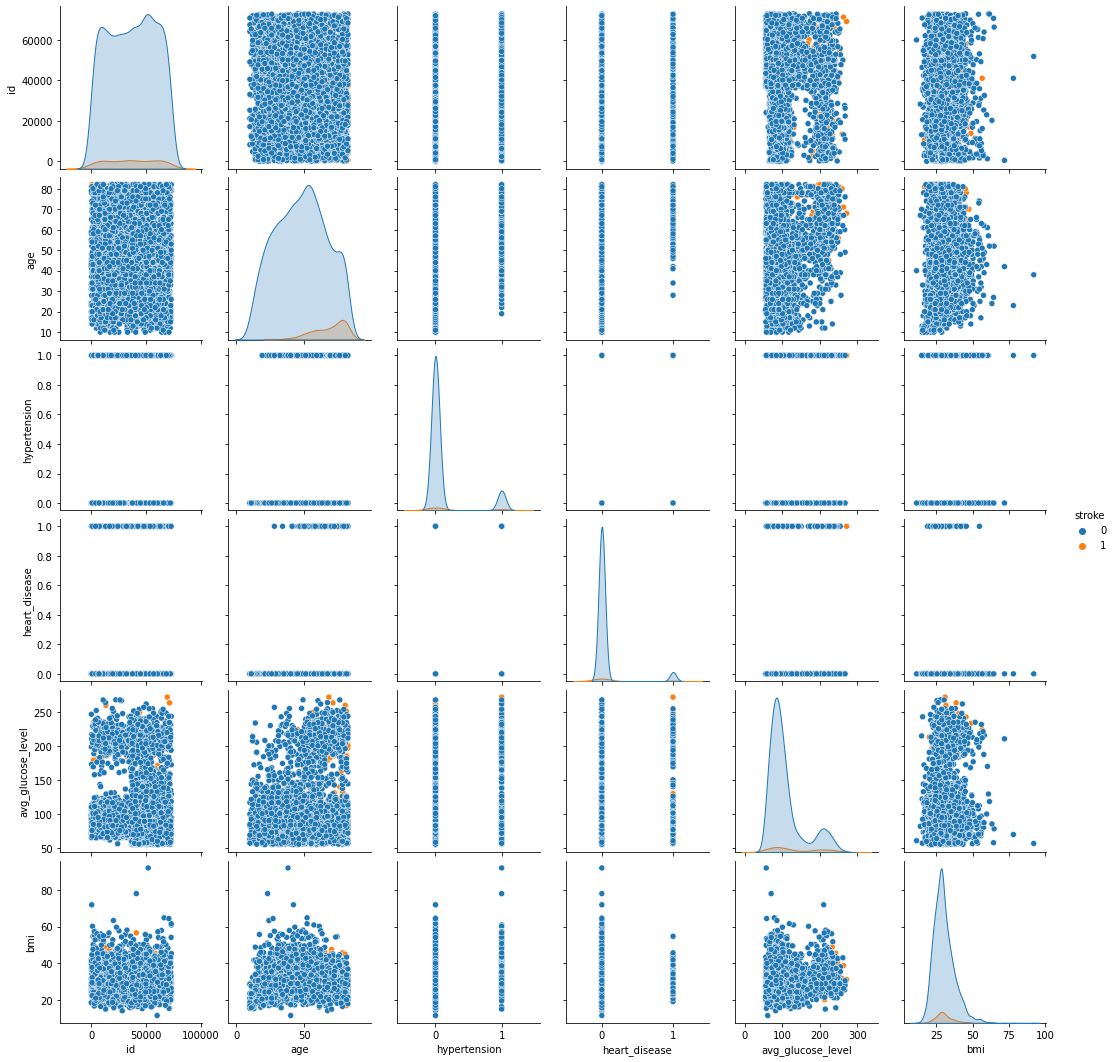

In [ ]:
#drawing a pair plot that shows the relationship between stroke and other parameters in the dataset
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(data,diag_kind="kde",hue="stroke")

In [ ]:
#upsampling the data as the number of patients with stroke is very less
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.stroke==0]
df_2 = data[data.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

1    3364
0    3363
Name: stroke, dtype: int64

In [ ]:
#printing the up sampled dataset
df_upsampled.reset_index(drop=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30468,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,56543,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,52800,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,41413,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,15266,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6722,58978,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6723,72081,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6724,2390,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
6725,6118,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


In [ ]:
#converting the upsampled data to a csv file
df_upsampled
df_upsampled.to_csv(r'/content/healthcare-dataset-stroke-data_updated.csv')

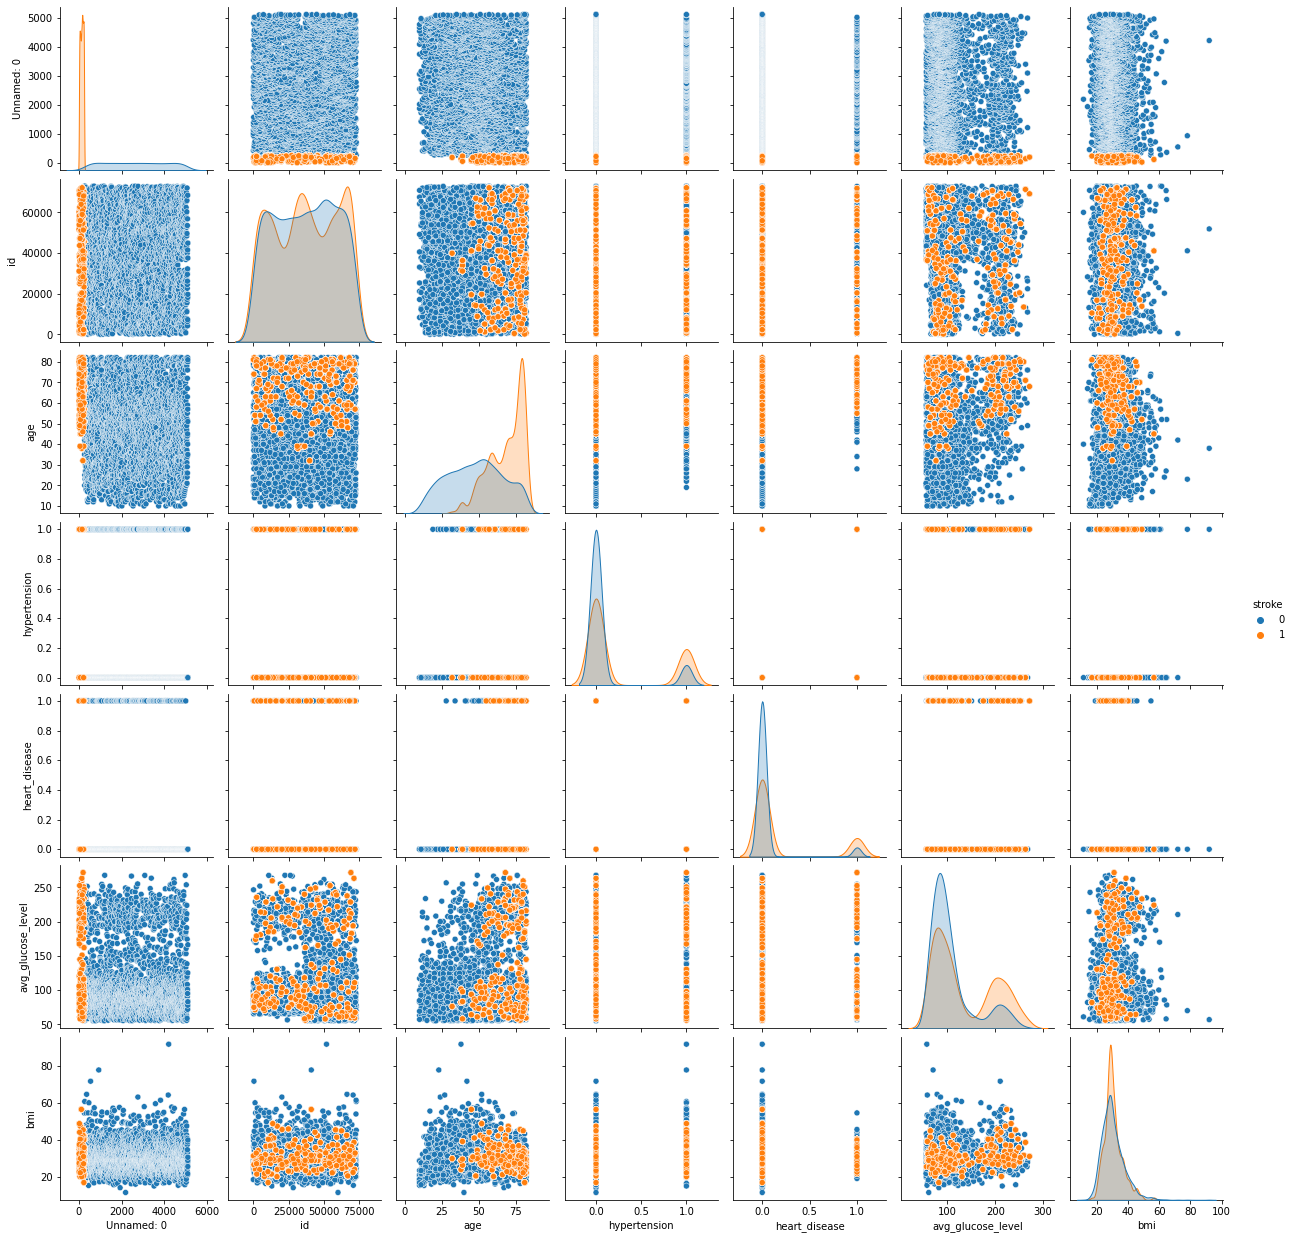

In [ ]:
#creating a pair plot between the independent variables and the dependent variable (stroke) for the updated data
data = pd.read_csv("/content/healthcare-dataset-stroke-data_updated.csv")
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(data,diag_kind="kde",hue="stroke")

In [ ]:
#post upsampling SQL analysis
df_csv=spark.read.csv('/content/healthcare-dataset-stroke-data_updated.csv', header=True)
df_csv.show()
csvRDD=df_csv.rdd
df_csv.groupBy("gender").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("hypertension").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("heart_disease").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("ever_married").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("work_type").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("residence_type").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("smoking_status").count() .orderBy("count",ascending=False).show()
df_csv.groupBy("stroke").count() .orderBy("count",ascending=False).show()
df_csv.createOrReplaceTempView("stroke")#creating a temporary view to run the SQL queries
#query 1 - this query will let us know how hypertension is impacting people of different age groups
spark.sql("select age ,  gender , count(hypertension) as people_with_hypertension from stroke where hypertension==1 group by  gender ,age order by count(hypertension) desc limit 50 ").show()
#query-2 this query will let us know how many patients in the list are suffering from a cardiac issue
spark.sql("select age ,  gender , count(heart_disease) as people_with_heart_disease from stroke where heart_disease==1 group by  gender, age order by count(heart_disease) desc ").show()
#quet -3 this query tells us how hupertension is impacting heart disesase
spark.sql("select count(hypertension) as people_with_hypertension_and_heart_disease  from stroke where hypertension==1 and heart_disease==1").show()
#query-5 this query will let us know how heart disease is impacting brain stroke
spark.sql("select count(stroke) as people_with_heart_disease_and_stroke  from stroke where heart_disease==1 and stroke==1").show()
#query-6 this query will let us know if the patients marital status has any impact on them getting a brain stroke
spark.sql("select count(stroke) as stroke_victims , ever_married as effect_of_marriage  from stroke where stroke==1 group by ever_married").show()
#query-7 this query will let us know if there is any relationship between marital status and getting a heart disease
spark.sql("select count(heart_disease) as heart_stroke_victims , ever_married as effect_of_marriage  from stroke where heart_disease==1 group by ever_married").show()
#query-8 this query will let us know if the patients' work place has any impact on geting brain stroke
spark.sql("select count(heart_disease) as heart_stroke_victims , work_type as type_of_work  from stroke where heart_disease==1 group by work_type").show()
#query-9 this query will let us know the average bmi of patients who are getting stroke
spark.sql("select avg(bmi) as AVG_BMI_for_stroke_patients from stroke where stroke==1").show()
#query -10 this query shows how the average bmi of patients who are healthy
spark.sql("select avg(bmi) as AVG_BMI_for_normal_patients from stroke where stroke==0 and heart_disease==0").show()
#query-11 this query will let us know the bmi of the patients who sustained both a brain stroke and a heart disease
spark.sql("select avg(bmi) as AVG_BMI_for_patients_with_both_conditions from stroke where stroke==1 and heart_disease==1").show()
#query -12 this query shows us the average glucose level of patients with brain stroke
spark.sql("select avg(avg_glucose_level) as avg_glucose_level_for_stroke_patients from stroke where stroke==1 ").show()
#query -13 this query shows us the average glucose level of the patients who has heart disease
spark.sql("select avg(avg_glucose_level) as avg_glucose_level_for_heart_patients from stroke where heart_disease==1 ").show()
#query -14 this query gives us the number of patients who are suffereing from a heart disease and their smoking status
spark.sql("select count(heart_disease) as number_of_smokers_and_heart_patients, smoking_status from stroke where heart_disease==1  group by smoking_status ").show()
#query -15 this query gives us the number of patients who are suffereing from a brain stroke and their smoking status
spark.sql("select count(stroke),smoking_status from stroke where stroke==1 group by smoking_status ").show()
#quey-16 this query would let us know if the patients area of residence has any impact on their stroke
spark.sql("select count(stroke)as number_of_stroke_patients,residence_type from stroke where stroke==1 group by residence_type ").show()
#quey-17 this query would let us know if the patients area of residence has any impact on their heart disease
spark.sql("select count(heart_disease) as number_of_heart_patients,residence_type from stroke where heart_disease==1 group by residence_type ").show()

+---+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|_c0|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+---+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|250|30468|  male|58.0|           1|            0|         yes|      private|         urban|            87.96|39.2|   never_smoked|     0|
|252|56543|female|70.0|           0|            0|         yes|      private|         rural|            69.04|35.9|formerly_smoked|     0|
|255|52800|female|52.0|           0|            0|         yes|      private|         urban|            77.59|17.7|formerly_smoked|     0|
|256|41413|female|75.0|           0|            1|         yes|self-employed|         rural|           243.53|27.0|   never_smoked|     0|
|257|15266|female|32.0|    

Text(0, 0.5, 'Count')

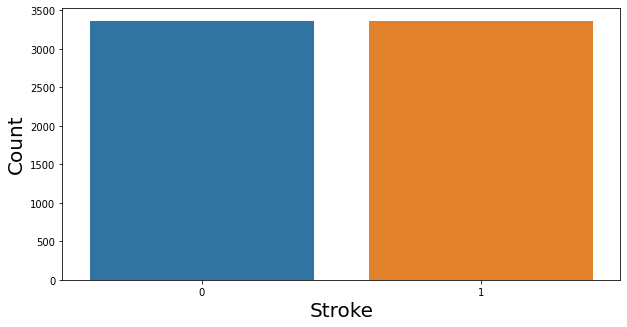

In [ ]:
##now we can see the patiets with stroke and no stroke are almost similar in number post upsampling
stroke_label = df_upsampled.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [ ]:
categorical = list(df_upsampled.dtypes[df_upsampled.dtypes == 'object'].index)
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

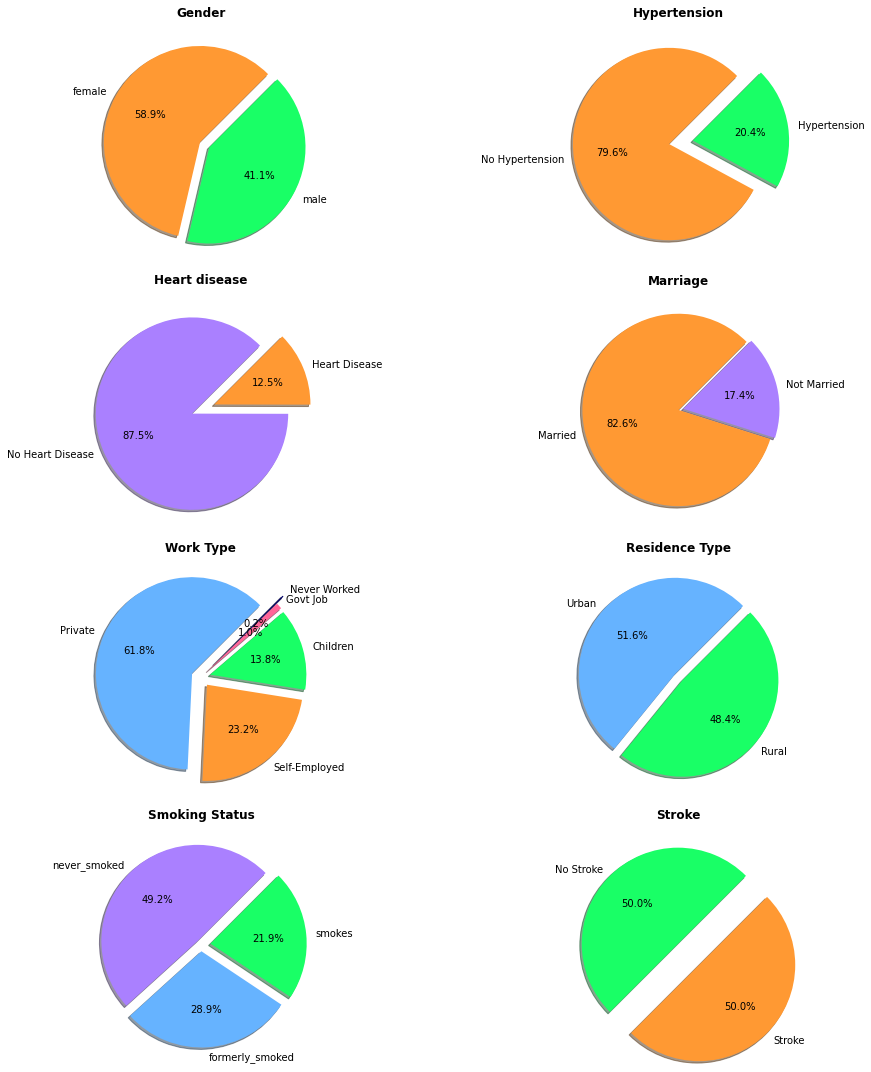

In [ ]:
#drawing pie distribution charts for each parameter in the dataset
fig, ax = plt.subplots(4,2, figsize = (15,15))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df_upsampled['gender'].value_counts().index.tolist()[:2]
values = df_upsampled['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df_upsampled['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df_upsampled['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df_upsampled['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df_upsampled['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df_upsampled['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["never_smoked", "formerly_smoked", "smokes"]
values = df_upsampled['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df_upsampled['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

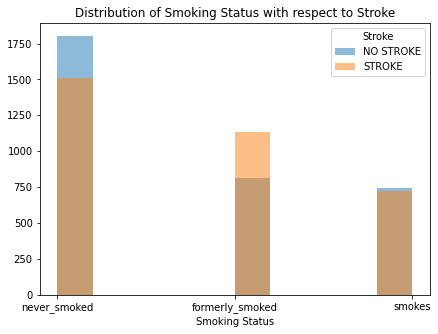

In [ ]:
#Distribution of Smoking Status with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] ==0], alpha = 0.5, label = "NO STROKE")
plt.hist("smoking_status", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Smoking Status with respect to Stroke")
plt.xlabel("Smoking Status")
plt.legend(title = "Stroke")
plt.show()

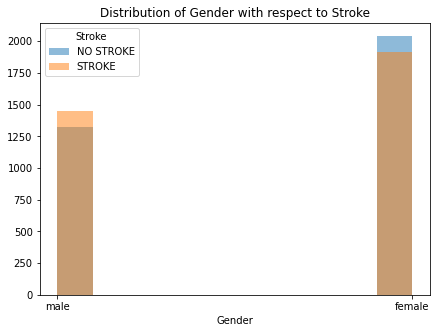

In [ ]:
#Distribution of Gender with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("gender", data = df_upsampled[df_upsampled["stroke"] == 0], alpha = 0.5, label = "NO STROKE")
plt.hist("gender", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Gender with respect to Stroke")
plt.xlabel("Gender")
plt.legend(title = "Stroke")
plt.show()

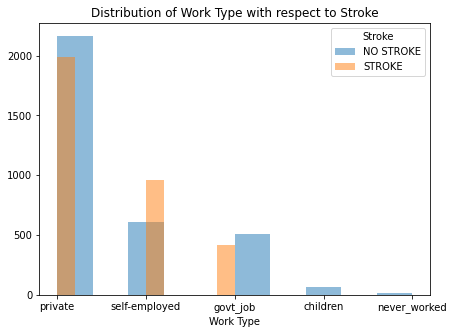

In [ ]:
#Distribution of Work Type with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("work_type", data = df_upsampled[df_upsampled["stroke"] == 0], alpha = 0.5, label = "NO STROKE")
plt.hist("work_type", data = df_upsampled[df_upsampled["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Work Type with respect to Stroke")
plt.xlabel("Work Type")
plt.legend(title = "Stroke")
plt.show()

# PART-2

In [ ]:
#Sorting feature according to their importance
df_upsampled.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.552833
avg_glucose_level    0.243669
hypertension         0.222758
heart_disease        0.208730
bmi                  0.017751
id                   0.012107
Name: stroke, dtype: float64

In [ ]:
# one hot encoding all the categories data and getting final dataset
final=pd.get_dummies(df_upsampled, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
final

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,ever_married_no,...,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
250,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
252,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
255,52800,52.0,0,0,77.59,17.7,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
256,41413,75.0,0,1,243.53,27.0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
257,15266,32.0,0,0,77.67,32.3,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,58978,70.0,0,1,239.07,26.1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
148,72081,57.0,1,0,67.41,32.9,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
216,2390,78.0,0,0,116.10,27.1,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
68,6118,59.0,0,0,86.23,30.0,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


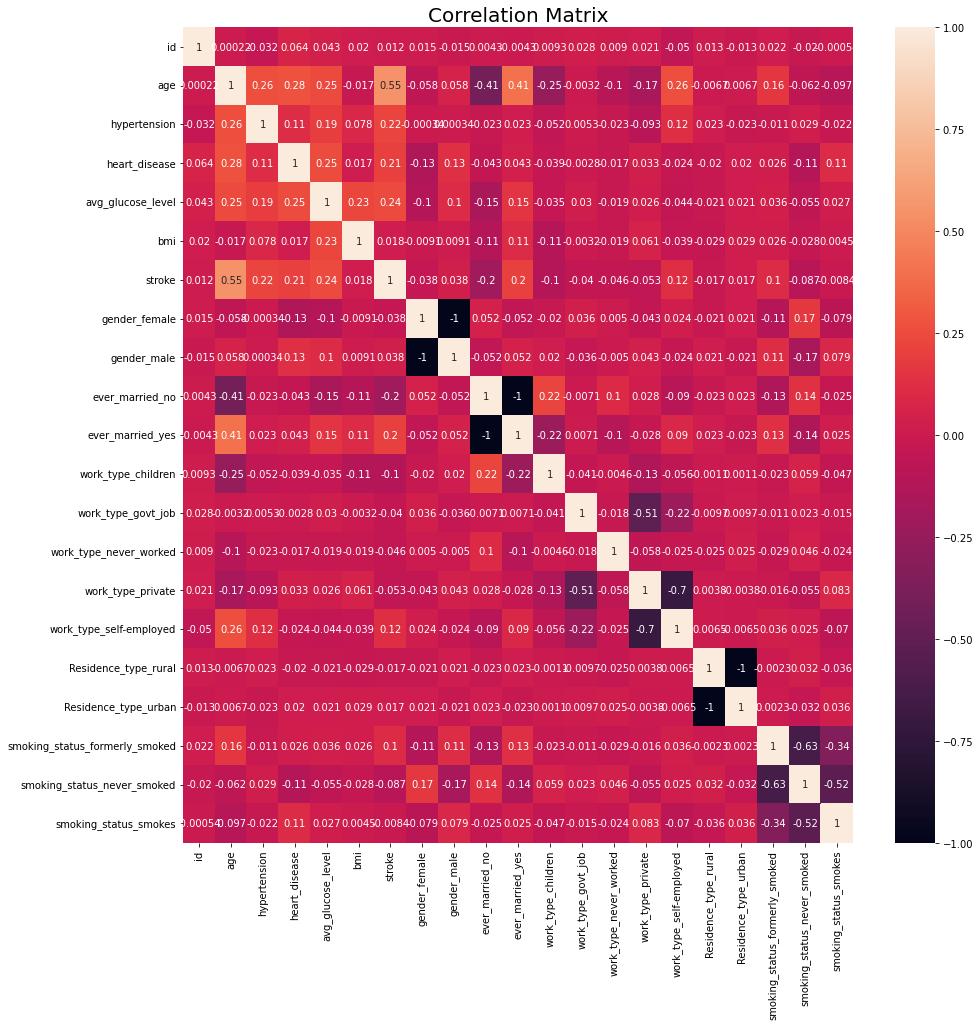

In [ ]:
#Correlation of all features after label encoding
plt.figure(figsize=(15, 15))
sns.heatmap(final.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
#Checking for importances of all features
final.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.552833
avg_glucose_level                 0.243669
hypertension                      0.222758
heart_disease                     0.208730
ever_married_yes                  0.195374
work_type_self-employed           0.123466
smoking_status_formerly_smoked    0.103848
gender_male                       0.037938
bmi                               0.017751
Residence_type_urban              0.017100
id                                0.012107
smoking_status_smokes            -0.008350
Residence_type_rural             -0.017100
gender_female                    -0.037938
work_type_govt_job               -0.040167
work_type_never_worked           -0.045674
work_type_private                -0.053411
smoking_status_never_smoked      -0.087269
work_type_children               -0.101816
ever_married_no                  -0.195374
Name: stroke, dtype: float64

In [ ]:
#finalizing the parameters and setting up stroke as the final target
feature_final=final[['age','hypertension',	'heart_disease',	'avg_glucose_level',	'bmi',	'gender_female','gender_male','ever_married_no',	'ever_married_yes',	'work_type_children',	'work_type_govt_job',	'work_type_never_worked',	'work_type_private',	'work_type_self-employed',	'Residence_type_rural',	'Residence_type_urban',	'smoking_status_formerly_smoked',	'smoking_status_never_smoked',	'smoking_status_smokes']]
target=final[["stroke"]]

In [ ]:
#setting up the correlating features
Corr_features = final[['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension','ever_married_yes','work_type_self-employed','smoking_status_formerly_smoked']]

In [ ]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

In [ ]:
#Scaling the features using MinMax Scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,train_size = 0.7,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
#final size of the training model
X_train.shape

(4708, 3)

In [ ]:
#final shape of the testing model
X_test.shape

(2019, 3)

In [ ]:
#final shape of the target _train
y_train.shape

(4708,)

In [ ]:
#final shape of the target test
y_test.shape

(2019,)

In [ ]:
#using logistic regression and testing the model
log_reg = LogisticRegression(C=0.1, max_iter=100).fit(X_train_scaled, y_train)
log_reg_pred= log_reg.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

log_reg_train_accuracy = log_reg.score(X_train_scaled,y_train)
log_reg_accuracy = log_reg.score(X_test_scaled,y_test)

pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

Training score: 0.745
Test score: 0.747


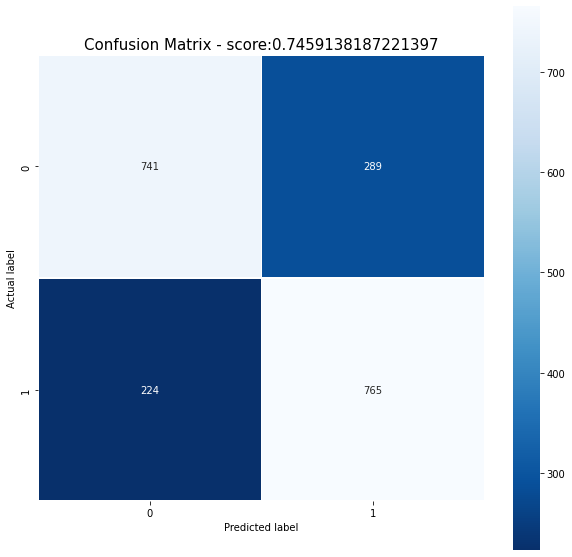

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1030
           1       0.73      0.77      0.75       989

    accuracy                           0.75      2019
   macro avg       0.75      0.75      0.75      2019
weighted avg       0.75      0.75      0.75      2019



In [ ]:
#creating a confusion matrix for the results of logistic regression
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train_scaled,y_train)
y_pred=log_reg_model.predict(X_test_scaled)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [ ]:
#creating a decision tree model, training and resting the data
tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
print(tree.feature_importances_)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

[0.43699325 0.32165788 0.24134887]
Training score: 0.999
Test score: 0.965


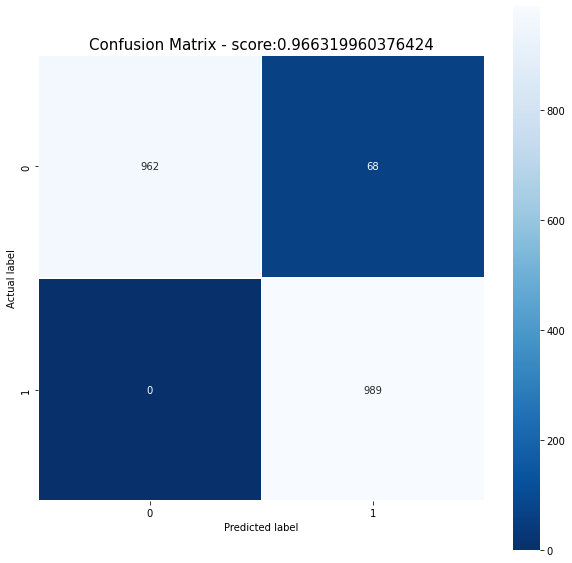

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1030
           1       0.94      1.00      0.97       989

    accuracy                           0.97      2019
   macro avg       0.97      0.97      0.97      2019
weighted avg       0.97      0.97      0.97      2019



In [ ]:
#creating a confusion matrix
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

need to Add more methods here

In [ ]:
#training and testing the data using random forest model
#max features and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting.
#max_features=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.

rf = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0).fit(X_train_scaled, y_train)
rf_pred= rf.score(X_test_scaled, y_test)


rf_train_accuracy =rf.score(X_train_scaled,y_train)
rf_accuracy = rf.score(X_test_scaled,y_test)
pred_prob_rf = rf.predict_proba(X_test_scaled)


print("Training score: {:.3f}".format(rf.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test_scaled, y_test)))

Training score: 1.000
Test score: 0.972


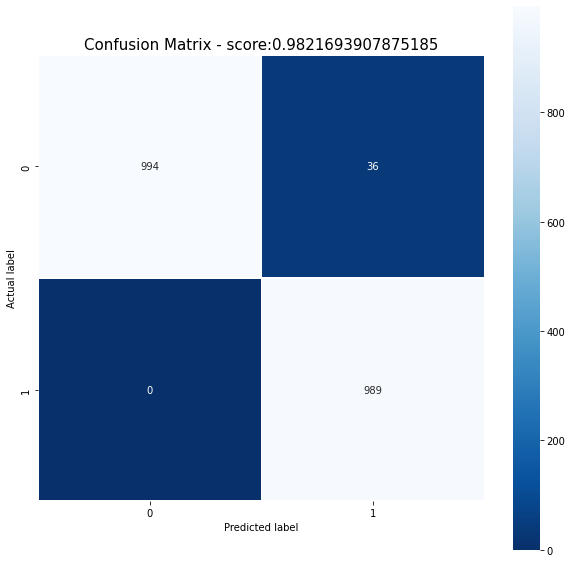

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1030
           1       0.96      1.00      0.98       989

    accuracy                           0.98      2019
   macro avg       0.98      0.98      0.98      2019
weighted avg       0.98      0.98      0.98      2019



In [ ]:
#creating a confusion matrix for the same
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled,y_train)
y_pred=rf_model.predict(X_test_scaled)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [ ]:
#training and testing the data using KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred=knn.score(X_test_scaled, y_test)

knn_train_accuracy =knn.score(X_train_scaled,y_train)
knn_accuracy = knn.score(X_test_scaled,y_test)
pred_prob_knn = knn.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Training score: 0.936
Test score: 0.912


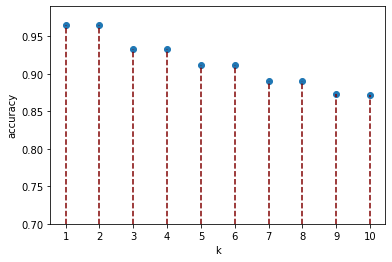

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

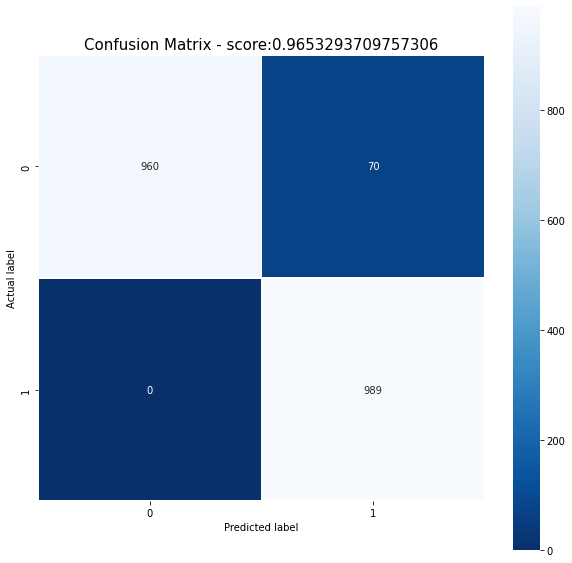

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1030
           1       0.93      1.00      0.97       989

    accuracy                           0.97      2019
   macro avg       0.97      0.97      0.97      2019
weighted avg       0.97      0.97      0.97      2019



In [ ]:
#creating a confusion matrix for KNN Model
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train_scaled,y_train)
y_pred=knn_model.predict(X_test_scaled)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [ ]:
#training the data using  Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
gnb_pred = gnb.score(X_test_scaled,y_test)
gnb_train_accuracy = gnb.score(X_train_scaled,y_train)
pred_prob_gnb = gnb.predict_proba(X_test_scaled)

print("Training accuracy = ",gnb.score(X_train_scaled,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test_scaled,y_test)
print("Testing accuracy = ",gnb.score(X_test_scaled,y_test))

Training accuracy =  0.7476635514018691
Testing accuracy =  0.7478949975235265


In [ ]:
#adding all the models and their respective predictions into a dictionaru
predictions_acc = { "Model": ['Decision Tree', 'Random Forest',   'Logistic Regression','KNeighbors',"Naive Bayes"],
"Accuracy": [tree_pred, rf_pred, log_reg_pred,knn_pred,gnb_pred]}

In [ ]:
#converting the dictionary into a dataframe and printing the dataframe
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Decision Tree,0.964834
1,Random Forest,0.971768
2,Logistic Regression,0.746904
3,KNeighbors,0.912333
4,Naive Bayes,0.747895


In [ ]:
#Average of Prediction of all models
print("Average accuracy : {:.3f}".format(model_acc.Accuracy.mean()))

Average accuracy : 0.869


In [ ]:
y_test_pred = tree.predict(X_test_scaled)
print("Accuracy Score of DTree:",accuracy_score(y_test,y_test_pred))

Accuracy Score of DTree: 0.9648340762753839


In [ ]:
#predicted output
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred})
output.head()

,Real_class,Predicted_class
4429,0,0
2994,0,0
3436,0,0
4689,0,0
1237,0,0


In [ ]:
#predicting using random forester model
prediction= rf_model.predict(np.array([[98,200,36]]))
print( "Person has tendency to get a stroke or not is ", prediction)

Person has tendency to get a stroke or not is  [0]


# PART-3

In [ ]:
#using spark mllib to do the predictions from now, reading the original dataset
data = spark.read.csv('/content/healthcare-dataset-stroke-data.csv',inferSchema=True,header=True) 

In [ ]:
#creating a spark session
from pyspark.sql import SparkSession

In [ ]:

spark = SparkSession.builder.appName('final_project').getOrCreate()

In [ ]:
#reading the data from the updated CSV File
data = spark.read.csv('/content/healthcare-dataset-stroke-data_updated.csv',inferSchema=True,header=True)

In [ ]:
#printing the schema of the table
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
#looking at the columns of the table
data.columns

['_c0',
 'id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [ ]:
#finding the total number of entries
data.count()

6727

In [ ]:
#importing Vector assembler , indexer , encoder and string indexer to clean and convert the data into a model readble form (numerical data)
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [ ]:
my_cols = data.select(['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke'])

In [ ]:
my_final_data = my_cols.na.drop()

In [ ]:
#indexing and encoding gender column from male and female to 0 and 1
gender_indexer = StringIndexer(inputCol='gender',outputCol='GenderIndex')
gender_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='SexVec')

In [ ]:
#indexing and converting work type from descriptive values to numbers
work_type_indexer = StringIndexer(inputCol='work_type',outputCol='wtIndex')
work_type_encoder = OneHotEncoder(inputCol='wtIndex',outputCol='wtVec')

In [ ]:
##indexing and converting residence type from descriptive values to numbers
residence_indexer = StringIndexer(inputCol='Residence_type',outputCol='reIndex')
residence_encoder = OneHotEncoder(inputCol='reIndex',outputCol='reVec')

In [ ]:
#indexing and converting smoking status from descriptive values to numbers
smoking_indexer = StringIndexer(inputCol='smoking_status',outputCol='smokeIndex')
smoking_encoder = OneHotEncoder(inputCol='smokeIndex',outputCol='smokeVec')

In [ ]:
#indexing and converting marital from descriptive values to numbers
marital_indexer = StringIndexer(inputCol='ever_married',outputCol='marriageIndex')
marital_encoder = OneHotEncoder(inputCol='marriageIndex',outputCol='marryVec')

In [ ]:
#feeding all the column vectors to the assembler
assembler = VectorAssembler(inputCols=['SexVec',
 'age',
 'hypertension',
 'heart_disease',
 'marryVec',
 'wtVec',
 'reVec',
 'avg_glucose_level',
 'bmi',
 'smokeVec',
 ],outputCol='features')

In [ ]:
#running logistic regression model using Spark ML Lib
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
log_reg_stroke = LogisticRegression(featuresCol='features',labelCol='stroke')
pipeline = Pipeline(stages=[gender_indexer,work_type_indexer,residence_indexer,smoking_indexer,marital_indexer ,
                           gender_encoder,work_type_encoder ,residence_encoder,smoking_encoder,marital_encoder,
                           assembler,log_reg_stroke])
train_stroke_data, test_stroke_data = my_final_data.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_stroke_data)
results = fit_model.transform(test_stroke_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
log_reg_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='stroke')


In [ ]:
#comparing the actual values and predicted values for logistic regression
results.select('stroke','prediction').show(20)


+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
#printing the accuracy of the logistic regression model
log_reg_eval.evaluate(results)

0.7506722977326653

In [ ]:
#running Random Forest Classifier model using Spark ML Lib
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
rf_stroke = RandomForestClassifier(featuresCol='features',labelCol='stroke')
pipeline = Pipeline(stages=[gender_indexer,work_type_indexer,residence_indexer,smoking_indexer,marital_indexer ,
                           gender_encoder,work_type_encoder ,residence_encoder,smoking_encoder,marital_encoder,
                           assembler,rf_stroke])
train_stroke_data, test_stroke_data = my_final_data.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_stroke_data)
results = fit_model.transform(test_stroke_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
rf_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='stroke')

In [ ]:
#comparing the actual values and predicted values for Random Forest Classifier
results.select('stroke','prediction').show(20)

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
#printing the accuracy of the random forest classifier  model
rf_eval.evaluate(results)

0.7811816496756256

In [ ]:
#running Naive Bayes model using Spark ML Lib
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
nb_stroke = NaiveBayes(featuresCol='features',labelCol='stroke')
pipeline = Pipeline(stages=[gender_indexer,work_type_indexer,residence_indexer,smoking_indexer,marital_indexer ,
                           gender_encoder,work_type_encoder ,residence_encoder,smoking_encoder,marital_encoder,
                           assembler,nb_stroke])
train_stroke_data, test_stroke_data = my_final_data.randomSplit([0.7,0.3])
fit_model = pipeline.fit(train_stroke_data)
results = fit_model.transform(test_stroke_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
nb_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='stroke')

In [ ]:
#comparing the actual values and predicted values for Naive Bayes Model
results.select('stroke','prediction').show(20)

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
#printing the accuracy of the Naive Bayes model
nb_eval.evaluate(results)

0.7012311889326531

In [ ]:
#running Decison tree model using Spark ML Lib
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
dt_stroke = DecisionTreeClassifier(featuresCol='features',labelCol='stroke')
pipeline = Pipeline(stages=[gender_indexer,work_type_indexer,residence_indexer,smoking_indexer,marital_indexer ,
                           gender_encoder,work_type_encoder ,residence_encoder,smoking_encoder,marital_encoder,
                           assembler,dt_stroke])
train_stroke_data, test_stroke_data = my_final_data.randomSplit([0.7,.3])
fit_model = pipeline.fit(train_stroke_data)
results = fit_model.transform(test_stroke_data)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
dt_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='stroke')

In [ ]:
#comparing the actual values and predicted values for Decision tree Model
 
results.select('stroke','prediction').show(20)


+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [ ]:
#printing the accuracy of the Decison Tree model
dt_eval.evaluate(results)

0.7819264362135042